Formativa

In [21]:
#importa as bibliotecas nescessarias para o codigo
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score,precision_score, recall_score
import matplotlib.pyplot  as plt
import seaborn as sns

In [4]:
produtos = pd.read_csv('dados_produtos.csv')#importa os dados do arquivos para o VScode

In [5]:
produtos.head()#exibe uma parte dos graficos para visualização

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [6]:
#transformando o product_name em string
produtos['product_name'] = produtos['product_name'].astype(str)

In [7]:
produtos['product_name'].value_counts()#conta o numero de vezes que os nomes dos produtos apareceu

product_name
Celular      21
Televisão    19
iPod         18
Videogame    17
Notebook     16
Cafeteira     9
Name: count, dtype: int64

<Figure size 1000x800 with 0 Axes>

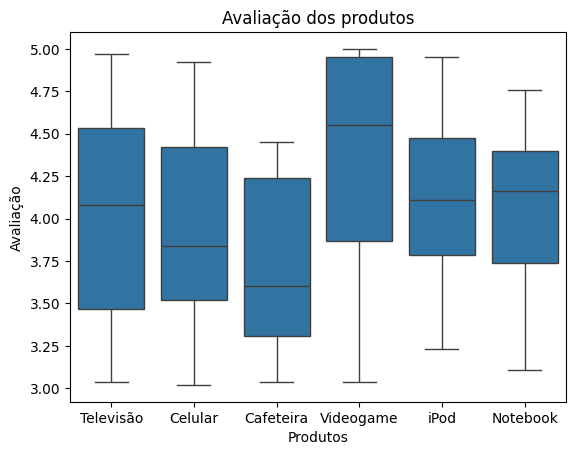

<Figure size 1000x800 with 0 Axes>

In [8]:
sns.boxplot(x='product_name',y='rating',data=produtos)#gera o boxplot com a sua coluna X sendo o nome dos arquivos e a Y sendo as valiações dos mesmos
plt.title("Avaliação dos produtos")#Titulo do grafico
plt.xlabel('Produtos')
plt.ylabel('Avaliação')
plt.figure(figsize=(10,8))#define o tamanho da figura

In [9]:
produtos.info()# verificando se tem dados invalido
#Renomeando os nomes das colunas
colunas={'product_name':'Nome_produtos',
         'rating':'Avaliaçoes',
         'rating_count':'Quantidade_avaliações',
         'purchased':'Compraram'
}
produtos.rename(columns=colunas,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [10]:
#teste para ver se funcionou o renomeio das colunas
produtos.head()

,Nome_produtos,Avaliaçoes,Quantidade_avaliações,Compraram
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [11]:
#Separando as avaliações dos produtos
x = produtos[['Avaliaçoes','Quantidade_avaliações']]
y = produtos['Compraram']

In [12]:
#separando os dados em treino e teste
x_train,x_test,y_train, y_test = train_test_split(x,y, test_size=0.3,
                                                  random_state=42)

In [13]:
model = DecisionTreeClassifier(random_state=42)#Cria o algoritimo de arvore de decisão
model.fit(x_train,y_train)# treino do modelo

DecisionTreeClassifier(random_state=42)

In [14]:
modelos_por_produto = {} #Criando um dicionario para armazenar as informações
#Salvando o modelo treinado em um dicionário
modelos_por_produto['Televisão'] = model

In [15]:
modelos_por_produto['Celular'] = model

Realizando a arvore de decisão geral

0.4666666666666667 [[ 5  4]
 [12  9]]


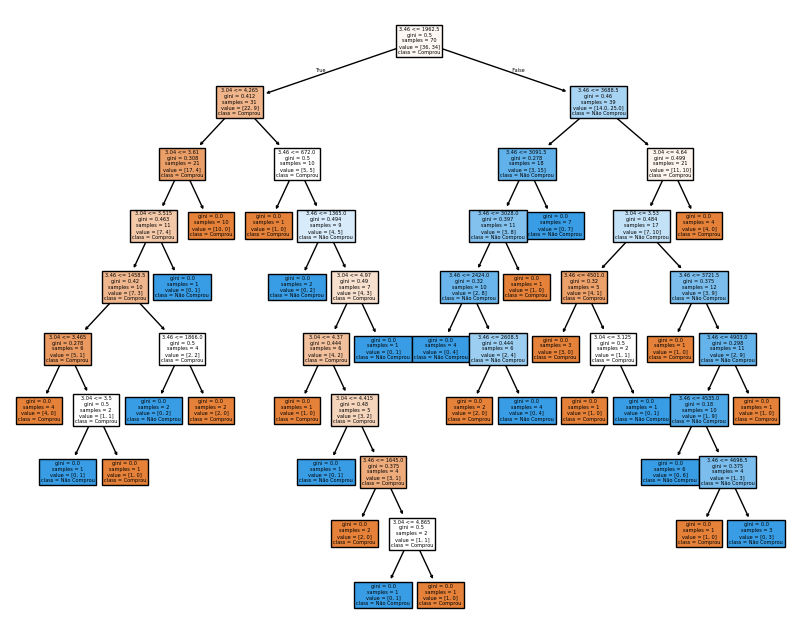

In [16]:
prev = model.predict(x_test)
acurracy = accuracy_score(y_test,prev)
matrix = confusion_matrix(y_test,prev)
print(acurracy, matrix)
produtos['Compraram'] = produtos['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=produtos['Avaliaçoes'].tolist(),class_names=produtos['Compraram'].tolist(),filled=True)
plt.show()

Realizando a Arvore de decisão de produtos separados


--------------------------- Árvore de Decisão do Produto Televisão ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 0.6666666666666666
Recall Score: 0.6666666666666666
Confusion Matrix: [[1 2]
 [0 1]]

Visualização da Árvore:


C:\Users\thale\AppData\Local\Temp\ipykernel_10284\2095039862.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


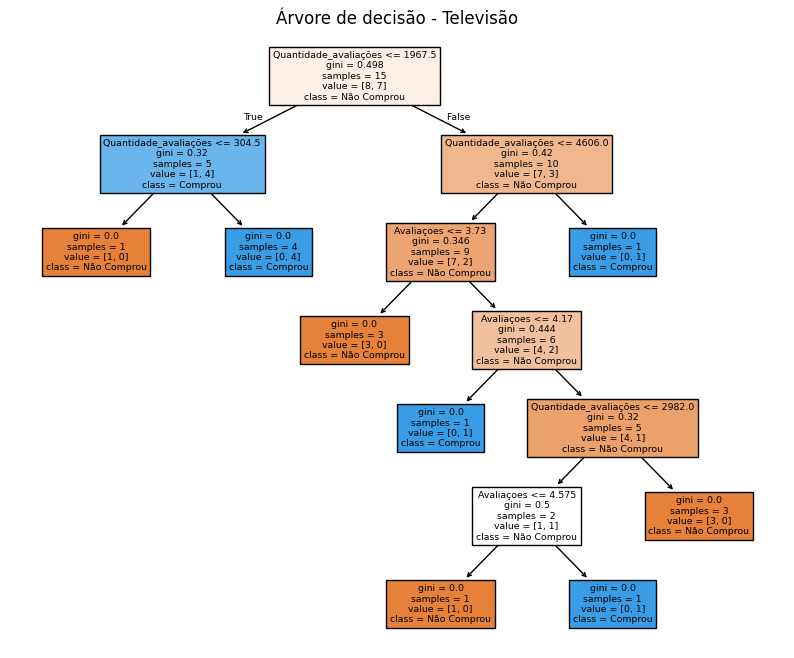


--------------------------- Árvore de Decisão do Produto Celular ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.6666666666666666
Precision Score: 0.75
Recall Score: 0.6666666666666666
Confusion Matrix: [[2 0]
 [2 1]]

Visualização da Árvore:


C:\Users\thale\AppData\Local\Temp\ipykernel_10284\2095039862.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


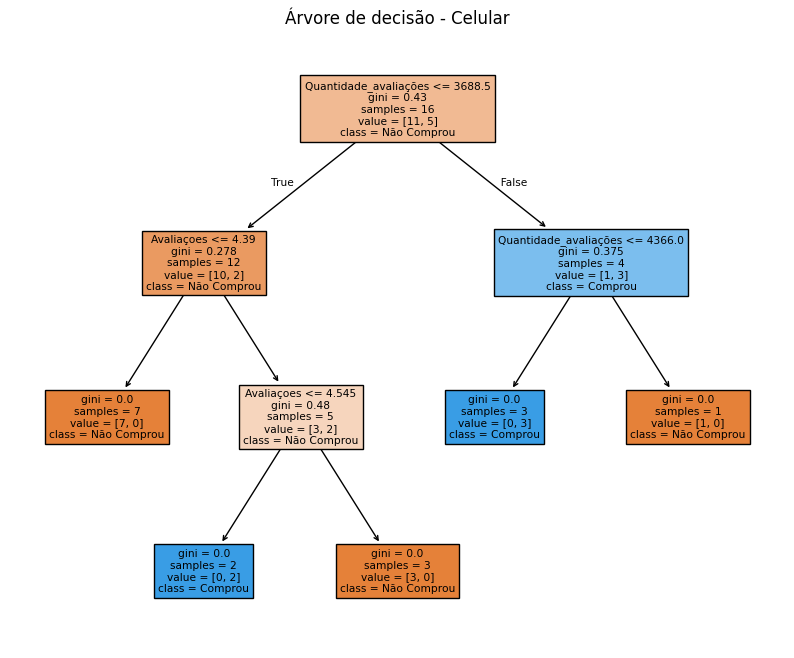


--------------------------- Árvore de Decisão do Produto Cafeteira ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.0
Precision Score: 0.25
Recall Score: 0.5
Confusion Matrix: [[0 1]
 [0 1]]

Visualização da Árvore:


C:\Users\thale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thale\AppData\Local\Temp\ipykernel_10284\2095039862.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


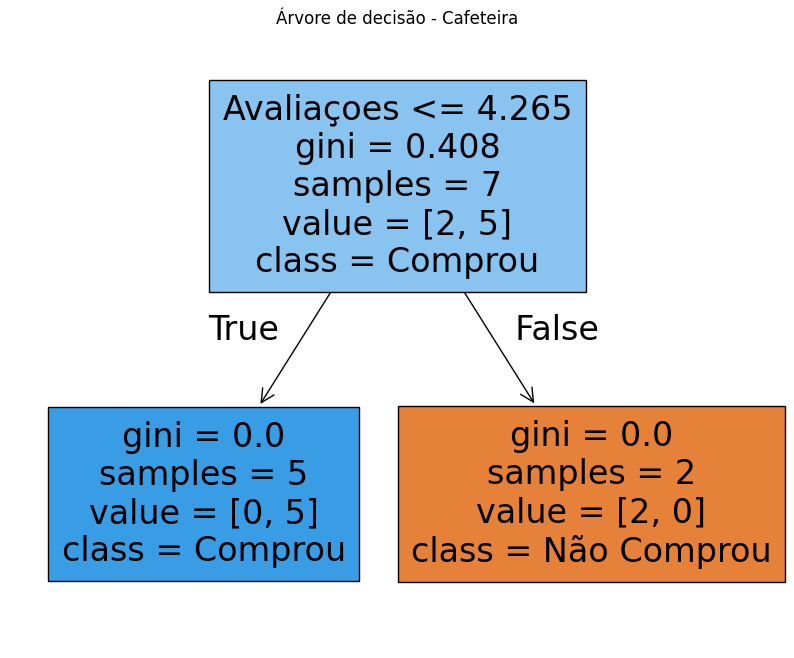


--------------------------- Árvore de Decisão do Produto Videogame ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
Confusion Matrix: [[4]]

Visualização da Árvore:


C:\Users\thale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\thale\AppData\Local\Temp\ipykernel_10284\2095039862.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


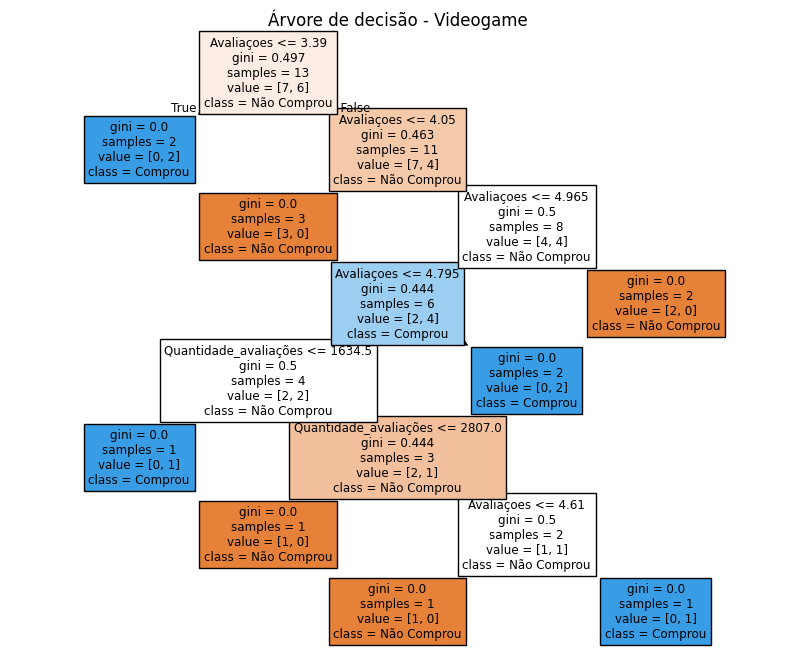


--------------------------- Árvore de Decisão do Produto iPod ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.25
F1 Score: 0.0
Precision Score: 0.16666666666666666
Recall Score: 0.25
Confusion Matrix: [[0 2]
 [1 1]]

Visualização da Árvore:


C:\Users\thale\AppData\Local\Temp\ipykernel_10284\2095039862.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])


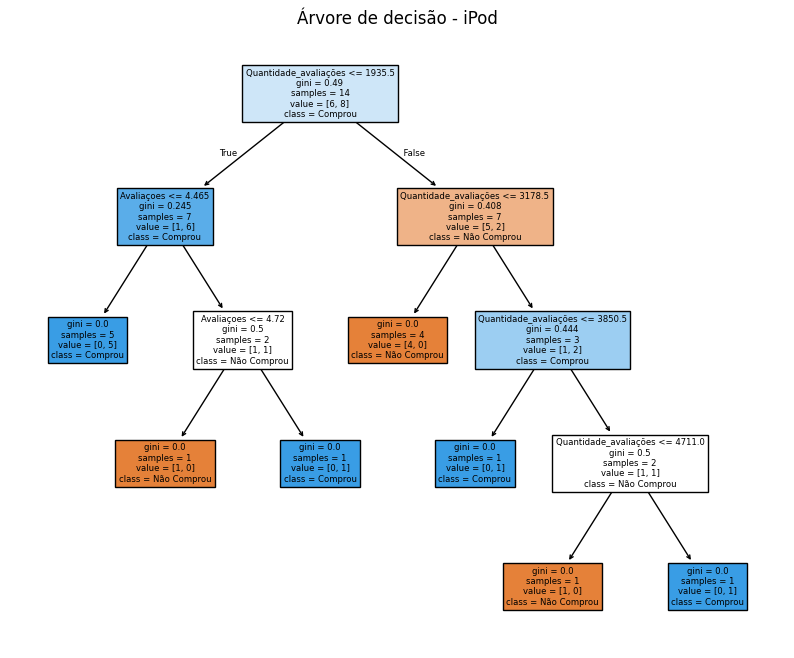

C:\Users\thale\AppData\Local\Temp\ipykernel_10284\2095039862.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])



--------------------------- Árvore de Decisão do Produto Notebook ---------------------------------

Avaliação do Modelo: 

Accuracy Score: 0.5
F1 Score: 0.5
Precision Score: 0.6666666666666666
Recall Score: 0.6666666666666666
Confusion Matrix: [[1 0]
 [2 1]]

Visualização da Árvore:


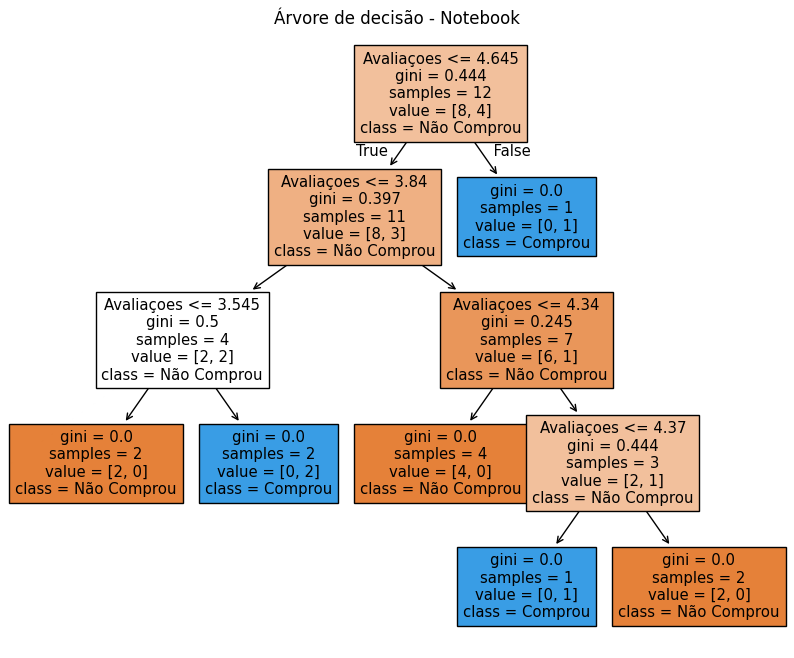

In [32]:
products = produtos['Nome_produtos'].unique()

for product in products:

    print(f'\n--------------------------- Árvore de Decisão do Produto {product} ---------------------------------\n')
    
    product_df = produtos.loc[produtos['Nome_produtos'] == product]

    # Corrigir a seleção de features (verifique se as colunas estão corretas)
    x = product_df.drop(['Compraram', 'Nome_produtos'], axis=1)  # Isso deve remover apenas o necessário
    y = product_df['Compraram']

    # Dividir os dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Criar e treinar o modelo de árvore de decisão
    dtc = DecisionTreeClassifier()
    model = dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)

    # Avaliação do modelo
    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred, pos_label="Comprou")}')  # Use 1 como a classe positiva (Comprou)
    print(f'Precision Score: {precision_score(y_test, y_pred, average="macro")}')
    print(f'Recall Score: {recall_score(y_test, y_pred, average="macro")}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')

    # Visualização da árvore
    print('\nVisualização da Árvore:')

    # Substitua os valores numéricos de 'Compraram' para as classes
    product_df['Compraram'] = product_df['Compraram'].replace([1, 0], ['Comprou', 'Não Comprou'])
    
    fig = plt.figure(figsize=(10, 8))
    
    # Corrigir o nome das features e classes na visualização
    tree.plot_tree(model, feature_names=x.columns, class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Árvore de decisão - {product}')
    plt.show()


Podemos concluir que as previsões não ficaram tão fieis aos resultados pois tivemos uma media da acuracia de apenas 50% por produto